# Historgrams of temperature distribution

The first few plots will show the distribution of temperature in halos, in different ways:

- Gas mass fraction vs. temperature histogram for individual halos of different masses
- Gas mass fraction vs. temperature histogram for all halos within a certain mass bin, averaged
- Gas mass fraction vs. temperature histogram for all halos in the simulation, averaged

## Set-up

Setting up the Python env

In [1]:
# IMPORTS
import logging
import logging.config
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import numpy.ma as ma
import os
import sys
from numpy.typing import ArrayLike
from pathlib import Path
from typing import Any, Union

import illustris_python as il

Importing helper scripts

In [2]:
# import the helper scripts
module_path = Path(os.getcwd()) / ".." / "src"
sys.path.append(str(module_path.resolve()))
import logging_config 
import plotters
import config
import constants

Set up a small logging environment for impromptu logging during lengthy operations:

In [3]:
logging_cfg = logging_config.get_logging_config("INFO")
logging.config.dictConfig(logging_cfg)
logger = logging.getLogger("root")
# test setup
logger.info("I am a test log!")

INFO: I am a test log!


Define some globals that point to different simulations:

In [21]:
TEST_SIM = "TNG50-4"
DEV_SIM = "TNG300-2"
MAIN_SIM = "TNG300-1"

## Probing plots

Firstly, the distribution of masses in the simulation should be probed to get an idea of how to best bin the halos by mass.

In [6]:
def plot_halo_mass_distribution() -> None:
    """Plot the mass distribution of halos in TNG300-1"""
    logger.info("Loading halo mass data.")
    cfg = config.get_config(MAIN_SIM)
    masses = il.groupcat.loadHalos(
        cfg.base_path, cfg.snap_num, fields=cfg.mass_field
    )
    # adjust for units
    masses = masses * 1e10 / constants.HUBBLE

    max_mass = np.max(masses)

    # plot hist of masses in log scale
    logger.info("Plotting histrogram.")
    fig, axes = plt.subplots(figsize=(5, 5))
    axes.set_xlabel(r"Masses ($M_{Crit, 200}$) [$\log M_\odot$]")
    axes.set_ylabel("Count")
    axes.set_title("Mass distribution in TNG300-1")
    plot_config = {
        "bins": 40,
        "histtype": "stepfilled",
        "log": False,
        "edgecolor": "black",
        "facecolor": "crimson",
    }
    # plot only the log and exclude masses near zero
    axes.hist(np.log10(masses[(masses > 1)]), **plot_config)
    # add info on min and max mass
    axes.text(11.8, 2e5, rf"Max mass: ${max_mass:.2e} M_\odot$")


INFO: Loading halo mass data.
INFO: Plotting histrogram.


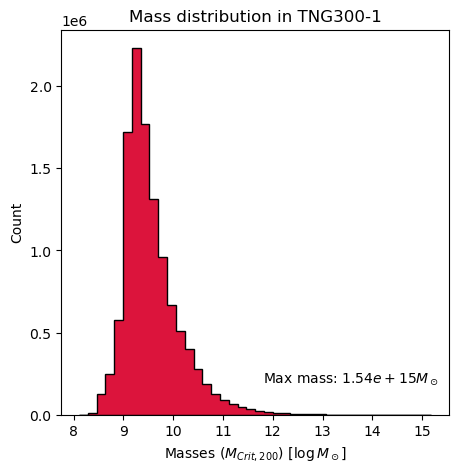

In [7]:
plot_halo_mass_distribution()

Judging by this, it is sensible to consider masses ranging from $10^8 M_\odot$ up to around $10^{15} M_\odot$, but given the fact that an overwhelmin majority of halos have masses between $10^8 M_\odot$ and $10^{12} M_\odot$, it might be advisable to exclude very high mass bins in the beginning and only consider them for plots of individual halo temperature distributions.

## Individual halos

We begin with plotting the temperature distribution of individual halos. For this purpose, we provide a class that can load the required data once and then offers separate plotting methods so that they may be tweaked without reloading the data every time. This class is already writte with stacked histograms in mind, i.e. it already collects all data required for later plots.

In [31]:
MASS_BINS = [1e8, 1e9, 1e10, 1e11, 1e12, 1e13, 1e14, 1e15]
hist_plotter = plotters.TemperatureDistributionPlotter(TEST_SIM, MASS_BINS)

In [32]:
# acquire data for plotting
hist_plotter.get_data()
print(hist_plotter)

Bin 0 [1.00e+08, 1.00e+09]): 61 halos
Bin 1 [1.00e+09, 1.00e+10]): 9488 halos
Bin 2 [1.00e+10, 1.00e+11]): 7324 halos
Bin 3 [1.00e+11, 1.00e+12]): 1271 halos
Bin 4 [1.00e+12, 1.00e+13]): 185 halos
Bin 5 [1.00e+13, 1.00e+14]): 21 halos
Bin 6 [1.00e+14, 1.00e+15]): 1 halos



In [33]:
# calculate hist data
hist_plotter.get_hists()

INFO: Beginning histogram data generation.
INFO: Processing halos in mass bin 0/7.
INFO: Finished processing mass bin 0/7, processed 61 halos.
INFO: Processing halos in mass bin 1/7.
INFO: Finished processing mass bin 1/7, processed 9403 halos.
INFO: Processing halos in mass bin 2/7.
INFO: Finished processing mass bin 2/7, processed 7310 halos.
INFO: Processing halos in mass bin 3/7.
INFO: Finished processing mass bin 3/7, processed 1271 halos.
INFO: Processing halos in mass bin 4/7.
INFO: Finished processing mass bin 4/7, processed 185 halos.
INFO: Processing halos in mass bin 5/7.
INFO: Finished processing mass bin 5/7, processed 21 halos.
INFO: Processing halos in mass bin 6/7.
INFO: Finished processing mass bin 6/7, processed 1 halos.
IO: 6487465.4754098365 ns (0.00%) | Calc: 1.6904692512869107e+18 ns (100.00%)
IO: 6314254.098798255 ns (0.00%) | Calc: 1.690469327015704e+18 ns (100.00%)
IO: 6383282.476744186 ns (0.00%) | Calc: 1.690469433292827e+18 ns (100.00%)
IO: 6468092.459480724

IndexError: list index out of range